### Import Libraries

In [1]:
#Import Required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC

### Import Data

In [2]:
df = pd.read_excel('Processed_data.xlsx')
df.head()

,Unnamed: 0,Review,Rating,Rating_Analysis,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,sentiment_polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words,pos_tags_words
0,0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking good deal stay ho...,nice hotel expensive parking good deal stay ho...,0.723158,0.229599,Positive,0.064,0.608,0.329,0.9769,Positive,5,Positive,484,73,nice expensive good stay anniversary arrive la...
1,1,ok nothing special charge diamond member hilto...,2,Negative,special charge diamond member hilton decided c...,special charge diamond member hilton decide ch...,0.534312,0.222302,Positive,0.049,0.735,0.216,0.9904,Positive,12,Positive,1410,205,special shot anniversary seattle suite extra w...
2,2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.598765,0.341534,Positive,0.048,0.677,0.275,0.9937,Positive,10,Positive,1197,174,nice seattle good large comfortable pillowsatt...
3,3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.691228,0.504825,Positive,0.000,0.564,0.436,0.9940,Positive,14,Positive,523,80,unique great wonderful excellent short main fr...
4,4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay seahawk game awesome dow...,great stay great stay seahawk game awesome dow...,0.696753,0.475649,Positive,0.078,0.623,0.299,0.9929,Positive,5,Positive,1007,155,great great seahawk awesome build huge helpful...


### Data Preparation

In [3]:
X=df['Lemmatized_Review']
y=df['Rating']
X.shape,y.shape

((20491,), (20491,))

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14343,), (6148,), (14343,), (6148,))

### TF - IDF Vectorization

In [7]:
tf_idf = TfidfVectorizer(ngram_range=(1,2),max_features=10000)
x_train_sparse = tf_idf.fit_transform(X_train)
x_train_df = pd.DataFrame(x_train_sparse.toarray(), columns=tf_idf.get_feature_names())
x_train_df.head()

,aaa,abc,ability,abroad,absolute,absolutely,absolutely amazing,absolutely beautiful,absolutely fabulous,absolutely fantastic,...,yr,yuck,yum,yummy,yunque,zip,zona,zona rosa,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
x_test_sparse = tf_idf.fit_transform(X_test)
x_test_df = pd.DataFrame(x_test_sparse.toarray(), columns=tf_idf.get_feature_names())
x_test_df.head()

,aaa,aaa rate,abc,abc store,ability,abit,abroad,absolute,absolutely,absolutely amazing,...,yr,yrs,yuan,yuck,yum,yummy,yunque,zealand,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
len(tf_idf.get_feature_names())

10000

In [10]:
x_train_df.shape,x_test_df.shape

((14343, 10000), (6148, 10000))

### Model Building // Model Evaluation // Model Testing

### Support Vector Machines - Classifier

In [11]:
svm_model = SVC()

In [12]:
svm_model.fit(x_train_df,y_train)

SVC()

In [13]:
svm_pred_train=svm_model.predict(x_train_df)
svm_pred_test=svm_model.predict(x_test_df)
svm_train_acc=accuracy_score(svm_pred_train,y_train)
svm_test_acc=accuracy_score(svm_pred_test,y_test)
print('Training Accuracy : ',(svm_train_acc*100).round(2))
print('Testing Accuracy  : ',(svm_test_acc*100).round(2))
svm_f1_tr=f1_score(svm_pred_train,y_train,average='weighted')
svm_f1_t=f1_score(svm_pred_test,y_test,average='weighted')
print('Training F1 Score : ',(svm_f1_tr*100).round(2))
print('Testing F1 Score  : ',(svm_f1_t*100).round(2))

Training Accuracy :  96.27
Testing Accuracy  :  44.06
Training F1 Score :  96.28
Testing F1 Score  :  56.51


In [14]:
svm_train=pd.DataFrame.from_dict(classification_report(svm_pred_train,y_train,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nSVM - Training Data')
svm_train.round(2)


SVM - Training Data


,1,2,3,4,5,weighted avg
precision,0.99,0.97,0.91,0.94,0.99,0.96
recall,0.99,0.99,1.00,0.95,0.95,0.96
f1-score,0.99,0.98,0.95,0.95,0.97,0.96
support,993.00,1232.00,1395.00,4169.00,6554.00,14343.00


In [15]:
svm_test=pd.DataFrame.from_dict(classification_report(svm_pred_test,y_test,output_dict=True))[['1','2','3','4','5','weighted avg']]
print('\033[1m'+'\nSVM - Testing Data')
svm_test.round(2)


SVM - Testing Data


,1,2,3,4,5,weighted avg
precision,0.03,0.03,0.0,0.08,0.93,0.85
recall,0.56,0.20,0.0,0.32,0.45,0.44
f1-score,0.06,0.05,0.0,0.13,0.61,0.57
support,25.00,69.00,7.0,459.00,5588.00,6148.00



Confusion Matrix - SVM - Training Data


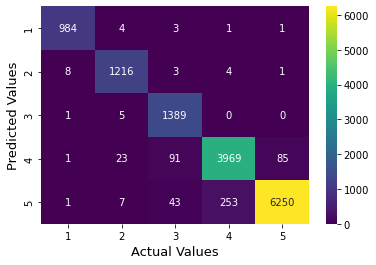

In [16]:
print('\033[1m'+'\nConfusion Matrix - SVM - Training Data')
sns.heatmap(confusion_matrix(svm_pred_train,y_train),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()


Confusion Matrix - SVM - Testing Data


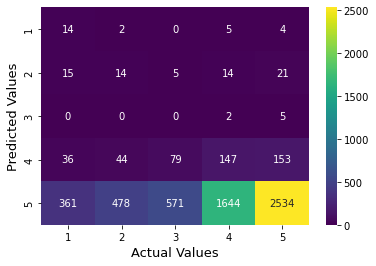

In [17]:
print('\033[1m'+'\nConfusion Matrix - SVM - Testing Data')
sns.heatmap(confusion_matrix(svm_pred_test,y_test),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

### Deployment

In [179]:
#Build Intelligence for TfidfVectorizer by training with whole dataset(Cleaned/Lemmatized Review Column)
tf_idf_deploy_svm = TfidfVectorizer()
tf_idf_deploy_svm.fit(X)

TfidfVectorizer()

In [180]:
#Transform Text into Numerical data for Building SVM
X_sparse = tf_idf_deploy.transform(X)

In [181]:
#Build Intelligence for Logistic Regression Model by training converted numerical dataset from TfidfVectorizer function
svm_deploy = SVC()
svm_deploy.fit(X_sparse,y)

LogisticRegression()

In [183]:
#Saving Both SVM and TfidfVectorizer Intelligence into Pickle file for deployment
deploy_svm=dump(obj=svm_deploy,file=open('deploy_svm.pkl','wb'))
deploy_svm_tfidf=dump(obj=tf_idf_deploy_svm,file=open('deploy_svm_tfidf.pkl','wb'))

### End !!!